<a href="https://colab.research.google.com/github/prasanna-miriyala70/demo/blob/main/handwriiten_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand written digit prediction-classification analysis**

# **Objective**

The objective is to classify handwritten digit images from the MNIST dataset using a machine learning model.


# **Data source**

The MNIST dataset, which is publicly available and can be loaded via scikit-learn.



# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# **Import Data**

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# **Describe Data**

In [3]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Sample of y:", np.unique(y))



Shape of X: (70000, 784)
Shape of y: (70000,)
Sample of y: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


# **Data Visualization**

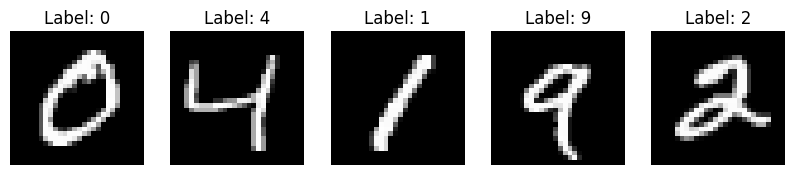

In [4]:
plt.figure(figsize=(10, 5))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()


# **Data Preprocessing**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# **Define Target variable (y) and feature variables(x)**

Already defined during data import

# **Train Test Split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Modelling**

In [7]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **Model Evaluation**

In [8]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.9165714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



# **Confusion Matrix Visualization**

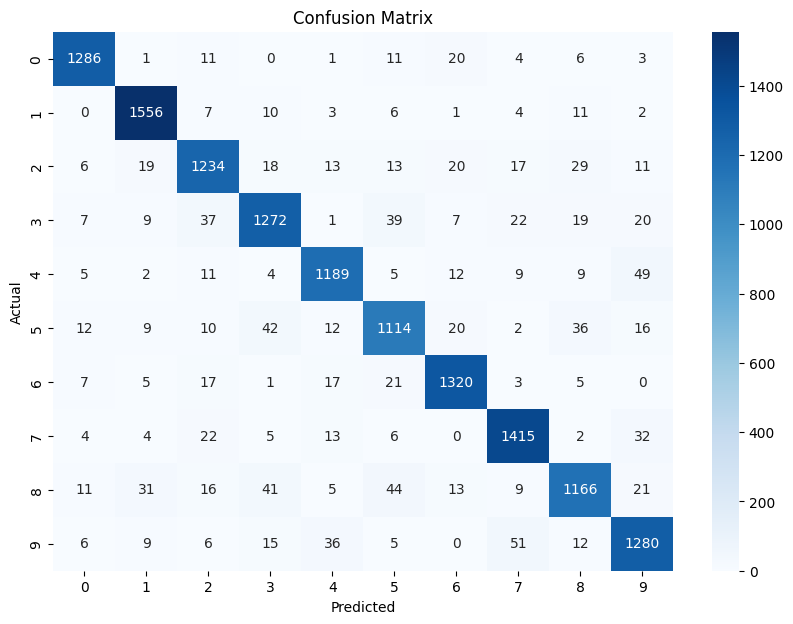

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Prediction**

Predicting the first 10 samples in the test set

In [10]:
sample_predictions = model.predict(X_test[:10])
print("Sample Predictions:", sample_predictions)
print("Actual Labels:", y_test[:10])



Sample Predictions: ['8' '4' '5' '7' '7' '0' '6' '2' '7' '7']
Actual Labels: 46730    8
48393    4
41416    8
34506    7
43725    7
11615    0
24656    6
22411    2
936      7
56364    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
